In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#import keras

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Importing Data

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
792,5726-CVNYA,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,146.6,No
5506,8048-DSDFQ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.2,No
2767,3572-UOLYZ,Female,0,No,Yes,46,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3958.85,No
4073,7683-CBDKJ,Male,0,Yes,Yes,14,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,65.45,937.6,Yes
3702,4818-QIUFN,Female,1,No,No,20,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.15,1520.9,Yes


## Data Exploration

In [4]:
data.drop("customerID",axis=1,inplace=True)
data.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2153,Female,0,Yes,No,25,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,74.6,1797.75,No


In [5]:
data.dtypes # looking for data types

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.TotalCharges.values #looking for data values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
pd.to_numeric(data.TotalCharges,errors="coerce")## act like no error

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
pd.to_numeric(data.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
data[pd.to_numeric(data.TotalCharges,errors="coerce").isnull()].shape ## finding null values

(11, 20)

In [11]:
data.shape

(7043, 20)

In [12]:
data1 = data[data.TotalCharges!=" "] #we attached null values to new df
data1.shape

(7032, 20)

In [13]:
data1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
pd.to_numeric(data1.TotalCharges) ## no error (because we droped null values)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [15]:
data1.TotalCharges = pd.to_numeric(data1.TotalCharges)

C:\Users\hitaskomur\AppData\Local\Temp\ipykernel_8492\3819501032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.TotalCharges = pd.to_numeric(data1.TotalCharges)


In [16]:
data1.TotalCharges.dtype

dtype('float64')

In [17]:
data1[data1.Churn =="No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [18]:
data1[data1.Churn =="No"].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

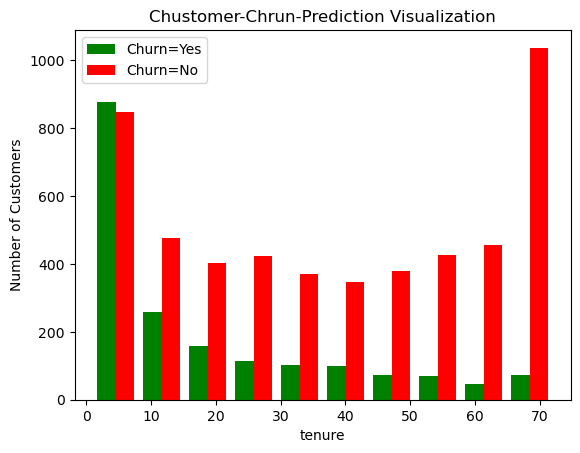

In [19]:
tenure_churn_no = data1[data1.Churn =="No"].tenure
tenure_churn_yes = data1[data1.Churn =="Yes"].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Chustomer-Chrun-Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()
plt.show()

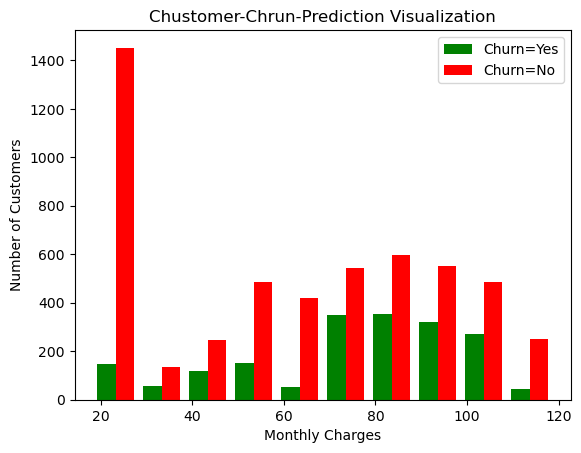

In [20]:
mc_churn_no = data1[data1.Churn =="No"].MonthlyCharges
mc_churn_yes = data1[data1.Churn =="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Chustomer-Chrun-Prediction Visualization")

plt.hist([mc_churn_yes,mc_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()
plt.show()

In [21]:
def print_unique_col_values(data):
    for column in data:
        if data[column].dtype == "object":
            print(f"{column} : {data[column].unique()}")

In [22]:
print_unique_col_values(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
data1.replace("No internet service","No",inplace=True)
data1.replace("No phone service","No",inplace=True)

print_unique_col_values(data1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


C:\Users\hitaskomur\AppData\Local\Temp\ipykernel_8492\236122451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No internet service","No",inplace=True)
C:\Users\hitaskomur\AppData\Local\Temp\ipykernel_8492\236122451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.replace("No phone service","No",inplace=True)


In [24]:
yes_no_columns = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in yes_no_columns:
    data1[col].replace({"Yes":1,"No":0},inplace=True)

C:\Users\hitaskomur\AppData\Local\Temp\ipykernel_8492\2187422709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col].replace({"Yes":1,"No":0},inplace=True)


In [25]:
for col in data1:
    print(f"{col} : {data1[col].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [26]:
data1.gender.replace({"Female" : 1,"Male" : 0},inplace=True)

C:\Users\hitaskomur\AppData\Local\Temp\ipykernel_8492\3315882857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.gender.replace({"Female" : 1,"Male" : 0},inplace=True)


In [27]:
data1.gender.unique()

array([1, 0], dtype=int64)

In [28]:
data2 = pd.get_dummies(data=data1, columns=["InternetService","Contract","PaymentMethod"],dtype=int)
data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
data2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6810,0,0,0,0,15,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6518,0,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4568,0,0,0,0,26,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0


In [30]:
data2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [31]:
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
data2[cols_to_scale] = scaler.fit_transform(data2[cols_to_scale])
data2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2339,1,1,0,0,0.281690,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6447,0,0,0,0,0.830986,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
3036,0,0,0,0,0.929577,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
2287,0,1,1,0,0.957746,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0


In [34]:
for col in data2:
    print(f"{col} : {data2[col].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [35]:
data2.dtypes


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [36]:
x = data2.drop("Churn",axis=1)
y = data2["Churn"]
x[:4]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [38]:
x_train.shape

(5625, 26)

In [39]:
x_test.shape

(1407, 26)

In [40]:
x_train[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0


In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(26,activation="relu",input_shape=(26,)))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
176/176 [==============================] - 0s 506us/step - loss: 0.4875 - accuracy: 0.7639
Epoch 2/30
176/176 [==============================] - 0s 528us/step - loss: 0.4332 - accuracy: 0.7886
Epoch 3/30
176/176 [==============================] - 0s 489us/step - loss: 0.4232 - accuracy: 0.7984
Epoch 4/30
176/176 [==============================] - 0s 506us/step - loss: 0.4187 - accuracy: 0.7980
Epoch 5/30
176/176 [==============================] - 0s 551us/step - loss: 0.4153 - accuracy: 0.8014
Epoch 6/30
176/176 [==============================] - 0s 536us/step - loss: 0.4129 - accuracy: 0.8012
Epoch 7/30
176/176 [==============================] - 0s 602us/step - loss: 0.4112 - accuracy: 0.8021
Epoch 8/30
176/176 [==============================] - 0s 568us/step - loss: 0.4099 - accuracy: 0.8060
Epoch 9/30
176/176 [==============================] - 0s 563us/step - loss: 0.4084 - accuracy: 0.8060
Epoch 10/30
176/176 [==============================] - 0s 523us/step - loss: 0.407

In [43]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 432us/step - loss: 0.4528 - accuracy: 0.7726


[0.45276394486427307, 0.7725657224655151]

In [44]:
y_predic = model.predict(x_test)
y_predic[:5]

array([[0.2545415 ],
       [0.38765922],
       [0.00730428],
       [0.74745774],
       [0.4016839 ]], dtype=float32)

In [45]:
y_predicted=[]

for i in y_predic:
    if i>0.50:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [46]:
y_predicted[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [47]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [48]:
y_test.value_counts()

Churn
0    999
1    408
Name: count, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       999
           1       0.65      0.47      0.54       408

    accuracy                           0.77      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

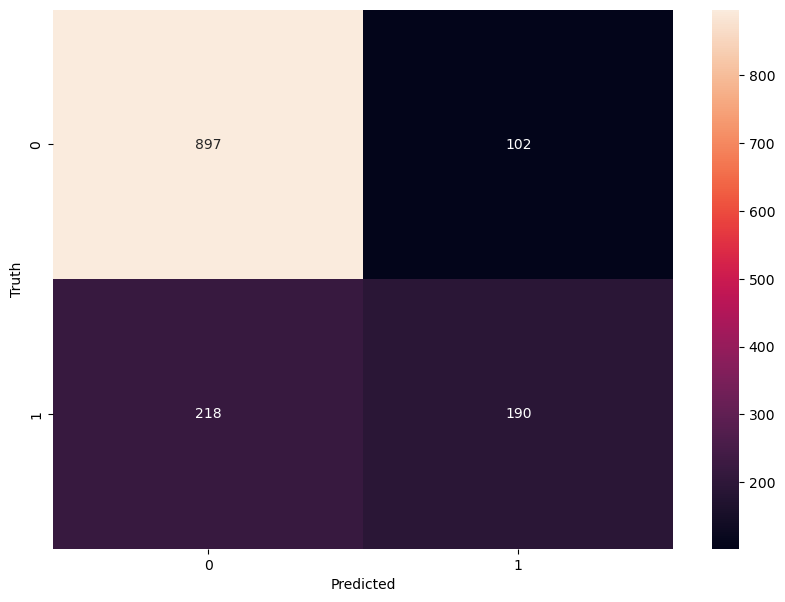

In [50]:
import seaborn as sn
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Imbalanced Methods

In [51]:
from sklearn.metrics import classification_report

In [52]:
def ANN(x_train, y_train, x_test, y_test , loss, weights):
    model = tf.keras.Sequential()
    
    
    model.add(tf.keras.layers.Dense(26, input_dim=26,activation ="relu"))
    model.add(tf.keras.layers.Dense(15, activation ="relu"))
    model.add(tf.keras.layers.Dense(1, activation ="sigmoid"))

    model.compile(optimizer="adam",loss = loss, metrics=["accuracy"])

    if weights == -1:
        model.fit(x_train,y_train,epochs=100)
    else :
        model.fit(x_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(x_test,y_test))

    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test,y_preds))

    return y_preds


In [53]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
176/176 [==============================] - 0s 614us/step - loss: 0.4812 - accuracy: 0.7643
Epoch 2/100
176/176 [==============================] - 0s 602us/step - loss: 0.4234 - accuracy: 0.7995
Epoch 3/100
176/176 [==============================] - 0s 517us/step - loss: 0.4170 - accuracy: 0.8052
Epoch 4/100
176/176 [==============================] - 0s 517us/step - loss: 0.4132 - accuracy: 0.8068
Epoch 5/100
176/176 [==============================] - 0s 534us/step - loss: 0.4105 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 0s 562us/step - loss: 0.4090 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 523us/step - loss: 0.4079 - accuracy: 0.8101
Epoch 8/100
176/176 [==============================] - 0s 499us/step - loss: 0.4067 - accuracy: 0.8082
Epoch 9/100
176/176 [==============================] - 0s 528us/step - loss: 0.4051 - accuracy: 0.8128
Epoch 10/100
176/176 [==============================] - 0s 608us/step - l

## METHOD-1

In [54]:
count_class_0 , count_class_1 = data2.Churn.value_counts()
data_class_0 = data2[data2["Churn"] == 0]
data_class_1 = data2[data2["Churn"] == 1]

In [55]:
data_class_0.shape

(5163, 27)

In [56]:
data_class_1.shape

(1869, 27)

In [57]:
data_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1722,1,0,0,0,0.704225,0,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
5078,1,0,1,1,0.929577,1,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0


In [58]:
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under,data_class_1],axis=0)

print("Random under-sampling:")
print(data_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [59]:
x = data_test_under.drop("Churn",axis=1)
y = data_test_under["Churn"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=15,stratify=y) 


In [60]:
y_train.value_counts()

Churn
1    1402
0    1401
Name: count, dtype: int64

In [61]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
88/88 [==============================] - 0s 580us/step - loss: 0.5942 - accuracy: 0.6914
Epoch 2/100
88/88 [==============================] - 0s 591us/step - loss: 0.5211 - accuracy: 0.7424
Epoch 3/100
88/88 [==============================] - 0s 596us/step - loss: 0.5075 - accuracy: 0.7496
Epoch 4/100
88/88 [==============================] - 0s 544us/step - loss: 0.5003 - accuracy: 0.7542
Epoch 5/100
88/88 [==============================] - 0s 545us/step - loss: 0.4974 - accuracy: 0.7553
Epoch 6/100
88/88 [==============================] - 0s 557us/step - loss: 0.4954 - accuracy: 0.7538
Epoch 7/100
88/88 [==============================] - 0s 545us/step - loss: 0.4942 - accuracy: 0.7553
Epoch 8/100
88/88 [==============================] - 0s 557us/step - loss: 0.4915 - accuracy: 0.7599
Epoch 9/100
88/88 [==============================] - 0s 557us/step - loss: 0.4903 - accuracy: 0.7581
Epoch 10/100
88/88 [==============================] - 0s 557us/step - loss: 0.4890 - accura

### REsults for model1

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       468
           1       0.76      0.79      0.77       467

    accuracy                           0.77       935
   macro avg       0.77      0.77      0.77       935
weighted avg       0.77      0.77      0.77       935


## Method 2 : Oversampling

In [62]:
count_class_0, count_class_1

(5163, 1869)

In [63]:
data_class_1.shape

(1869, 27)

In [64]:
data_class_0.shape

(5163, 27)

In [65]:
data_class_1.sample(2000,replace=True).shape## copied randomly for exits 2000 sample

(2000, 27)

In [66]:
data_class_1_over = data_class_1.sample(count_class_0,replace=True)## copied randomly for exits 2000 sample
data_class_1_over.shape

data_test_over = pd.concat([data_class_0,data_class_1_over],axis=0)
print("random over-sampling:")
print(data_test_over.Churn.value_counts())

random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [67]:
x = data_test_over.drop("Churn",axis=1)
y = data_test_over.Churn

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=15,stratify=y)

In [69]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [70]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [71]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 0s 541us/step - loss: 0.5631 - accuracy: 0.7211
Epoch 2/100
259/259 [==============================] - 0s 544us/step - loss: 0.4995 - accuracy: 0.7551
Epoch 3/100
259/259 [==============================] - 0s 541us/step - loss: 0.4892 - accuracy: 0.7596
Epoch 4/100
259/259 [==============================] - 0s 772us/step - loss: 0.4824 - accuracy: 0.7636
Epoch 5/100
259/259 [==============================] - 0s 568us/step - loss: 0.4773 - accuracy: 0.7671
Epoch 6/100
259/259 [==============================] - 0s 572us/step - loss: 0.4722 - accuracy: 0.7694
Epoch 7/100
259/259 [==============================] - 0s 548us/step - loss: 0.4672 - accuracy: 0.7712
Epoch 8/100
259/259 [==============================] - 0s 552us/step - loss: 0.4647 - accuracy: 0.7745
Epoch 9/100
259/259 [==============================] - 0s 568us/step - loss: 0.4612 - accuracy: 0.7765
Epoch 10/100
259/259 [==============================] - 0s 525us/step - l

### result for model 2 :

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066


### method 3 : SMOTE

In [72]:
x = data2.drop("Churn",axis=1)
y = data2["Churn"]
x.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2040,0,0,1,0,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
2528,1,0,0,0,0.098592,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5849,0,0,1,0,0.873239,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
6588,1,0,1,1,0.309859,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
323,1,0,1,1,0.112676,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [73]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority")
x_sm,y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [78]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [79]:
y_preds = ANN(x_train,y_train,x_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 0s 625us/step - loss: 0.5255 - accuracy: 0.7430
Epoch 2/100
259/259 [==============================] - 0s 552us/step - loss: 0.4710 - accuracy: 0.7753
Epoch 3/100
259/259 [==============================] - 0s 560us/step - loss: 0.4617 - accuracy: 0.7824
Epoch 4/100
259/259 [==============================] - 0s 595us/step - loss: 0.4565 - accuracy: 0.7829
Epoch 5/100
259/259 [==============================] - 0s 579us/step - loss: 0.4511 - accuracy: 0.7868
Epoch 6/100
259/259 [==============================] - 0s 541us/step - loss: 0.4472 - accuracy: 0.7886
Epoch 7/100
259/259 [==============================] - 0s 564us/step - loss: 0.4416 - accuracy: 0.7918
Epoch 8/100
259/259 [==============================] - 0s 575us/step - loss: 0.4373 - accuracy: 0.7952
Epoch 9/100
259/259 [==============================] - 0s 556us/step - loss: 0.4324 - accuracy: 0.8011
Epoch 10/100
259/259 [==============================] - 0s 601us/step - l

#### result for method 3 
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1033
           1       0.80      0.79      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066